<a href="https://colab.research.google.com/github/jvelasquezpi/MetNumUN2024I/blob/main/Lab%202/jvelasquezpi_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U fortran-magic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.9 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: unhashable type: 'slice'

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
4 * "a"

'aaaa'

In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 37 µs, sys: 0 ns, total: 37 µs
Wall time: 41 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
def matmul2(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
%%time

matmul2(a, b)

IndexError: list index out of range

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
def matmul3(A, B):
    """Multiply matrix A by matrix B."""
    if len(A[0]) != len(B):
      print("Matrix incompatible")
    else:
      rows_out = len(A)
      cols_out = len(B[0])
      out = [[0 for col in range(cols_out)] for row in range(rows_out)]

      for i in range(rows_out):
          for j in range(cols_out):
              for k in range(len(A[0])):
                  out[i][j] += A[i][k] * B[k][j]
      return out

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

matmul3(a,b)

Matrix incompatible


**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [ ]:
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5],
     [6, 7, 8, 9]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
import random

In [ ]:
random.normalvariate(0,1)

-0.7408214604096173

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.7940076692925755, 0.5894485035707223, 0.031075563848902865],
 [0.8148648761316387, 0.876101876560792, 0.09402236276707088]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [ ]:
import time
exectime=[]
for i in range(10):
  randa = random_matrix(600, 100)
  randb = random_matrix(100, 600)
  start_time = time.time()
  result = matmul3(randa, randb)
  exectime.append(time.time() - start_time)
exectime
npexectime = np.array(exectime)
pytime = npexectime.mean()
print("--- %s seconds average ---" % (pytime))


--- 9.614665174484253 seconds average ---


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [ ]:
language_benchmark = pd.DataFrame({'Language':[],'Average time(s)':[]})

language_benchmark = language_benchmark.append({'Language':'Python','Average time(s)':pytime}, ignore_index=True)

language_benchmark

<ipython-input-35-d87d0501bf01>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  language_benchmark = language_benchmark.append({'Language':'Python','Average time(s)':pytime}, ignore_index=True)


,Language,Average time(s)
0,Python,9.614665


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [ ]:
import time
exectime=[]
for i in range(10):
  randa = np.array(random_matrix(600, 100))
  randb = np.array(random_matrix(100, 600))
  start_time = time.time()
  result = np.matmul(randa, randb)
  exectime.append(time.time() - start_time)
exectime
npexectime = np.array(exectime)
nptime = npexectime.mean()
print("--- %s seconds average ---" % (nptime))
language_benchmark = language_benchmark.append({'Language':'Numpy','Average time(s)':nptime}, ignore_index=True)
language_benchmark

--- 0.006863737106323242 seconds average ---


<ipython-input-36-a63294bc28c8>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  language_benchmark = language_benchmark.append({'Language':'Numpy','Average time(s)':nptime}, ignore_index=True)


,Language,Average time(s)
0,Python,9.614665
1,Numpy,0.006864


In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 10.3 s, sys: 29.3 ms, total: 10.3 s
Wall time: 12.3 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 11.1 ms, sys: 2 ms, total: 13.1 ms
Wall time: 15.5 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 195 µs, sys: 0 ns, total: 195 µs
Wall time: 206 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [ ]:
A = [[45.0, 67.0],
     [12.0, 64.0]]

B = [[12.0, 45.0],
     [23.0, 85.0]]

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [ ]:
%%fortran
subroutine matmul_2_2_fortran(A, B, res)
    real, intent(in)::A(2,2)
    real, intent(in)::B(2,2)
    real, intent(out)::res(2,2)
    do i=1,2
      do j=1,2
        do k=1,2
          res(i,j) = res(i,j) + A(i,k) * B(k,j)
        end do
      end do
    end do
end

**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [ ]:
%%time
matmul_2_2_fortran(A,B)

CPU times: user 42 µs, sys: 1e+03 ns, total: 43 µs
Wall time: 47.2 µs


array([[2081., 7720.],
       [1616., 5980.]], dtype=float32)

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:
%%fortran
subroutine matmul_600_fortran(A, B, res)
    real, intent(in)::A(600,100)
    real, intent(in)::B(100,600)
    real, intent(out)::res(600,600)
    do i=1,600
      do j=1,600
        do k=1,100
          res(i,j) = res(i,j) + A(i,k) * B(k,j)
        end do
      end do
    end do
end

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [ ]:
randa = np.array(random_matrix(600, 100))
randb = np.array(random_matrix(100, 600))
matmul_600_fortran(randa,randb)

array([[25.387192, 24.620304, 24.895554, ..., 24.975616, 28.276901,
        26.5479  ],
       [21.105886, 23.373066, 23.375128, ..., 22.321016, 23.516495,
        23.766565],
       [21.757803, 23.614925, 22.459263, ..., 21.608774, 22.764362,
        24.178202],
       ...,
       [23.359854, 21.940363, 22.707064, ..., 25.09558 , 24.615295,
        24.344288],
       [23.797115, 24.14015 , 23.913363, ..., 24.039679, 23.314035,
        25.810808],
       [22.511778, 22.196383, 22.191084, ..., 22.227943, 24.283308,
        22.796768]], dtype=float32)

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [ ]:
import time
exectime=[]
for i in range(10):
  randa = np.array(random_matrix(600, 100))
  randb = np.array(random_matrix(100, 600))
  start_time = time.time()
  result = matmul_600_fortran(randa, randb)
  exectime.append(time.time() - start_time)
exectime
ftmexectime = np.array(exectime)
ftmtime = npexectime.mean()
print("--- %s seconds average ---" % (ftmtime))
language_benchmark = language_benchmark.append({'Language':'Fortranmagic','Average time(s)':ftmtime}, ignore_index=True)
language_benchmark



--- 0.006863737106323242 seconds average ---


<ipython-input-48-b4e6f32fcad8>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  language_benchmark = language_benchmark.append({'Language':'Fortranmagic','Average time(s)':ftmtime}, ignore_index=True)


,Language,Average time(s)
0,Python,9.614665
1,Numpy,0.006864
2,Fortranmagic,0.006864


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matmulf.f90

program matmulf

  integer :: i,j
  integer, dimension(600, 100) :: A
  integer, dimension(100, 600) :: B
  integer, dimension(100, 100) :: C

  do i = 1, 600
    do j = 1, 100
        A(i, j) = i+j
    end do
  end do

  do i = 1, 100
    do j = 1, 600
        B(i, j) = i*j
    end do
  end do

  call cpu_time(t1)
  do i = 1, 10**4
    C = matmul(B, A)
  end do
  call cpu_time(t2)

  avg_t=(t2-t1)/(10**4)

  write (*,*) "average execution time :",avg_t , "seconds"

  open(unit=1,file="fortran_benchmark.txt",status='replace')
  write(1,*) avg_t
  close(1)
  stop
end program matmulf

Writing matmulf.f90


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!gfortran -o matmulf matmulf.f90
!./matmulf

 average execution time :   7.13349902E-04 seconds


**My own example 18 - Adding Fortran average execution time to the data frame**

In [ ]:
with open('fortran_benchmark.txt') as f:
    avg_t = float(f.read().strip())
print('Fortran average time:', avg_t)

language_benchmark = language_benchmark.append({'Language': 'Fortran', 'Average time(s)': avg_t}, ignore_index=True)
language_benchmark

Fortran average time: 0.000713349902


<ipython-input-51-5b3be116514f>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  language_benchmark = language_benchmark.append({'Language': 'Fortran', 'Average time(s)': avg_t}, ignore_index=True)


,Language,Average time(s)
0,Python,9.614665
1,Numpy,0.006864
2,Fortranmagic,0.006864
3,Fortran,0.000713


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matmulc.c
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

#define RA 600
#define RB 100
#define CA 100
#define CB 600

int main() {
    double A[RA][CA], B[RB][CB], C[RA][CB];
    int i, j, k, count;
    clock_t start, end;
    double cput, total_time = 0;

    for (i = 0; i < RA; i++) {
        for (j = 0; j < CA; j++) {
            A[i][j] = rand() % 10;
        }
    }
    for (i = 0; i < RB; i++) {
        for (j = 0; j < CB; j++) {
            B[i][j] = rand() % 10;
        }
    }

    for (count = 0; count < 10; count++) {
        start = clock();
        for (i = 0; i < RA; i++) {
            for (j = 0; j < CB; j++) {
                C[i][j] = 0;
                for (k = 0; k < CA; k++) {
                    C[i][j] += A[i][k] * B[k][j];
                }
            }
        }
        end = clock();
        cput = ((double) (end - start)) / CLOCKS_PER_SEC;
        total_time += cput;
    }

    double average_time = total_time / 10;
    printf("Average execution time: %f seconds\n", average_time);
    FILE *file = fopen("c_benchmark.txt", "w");
    fprintf(file, "%f\n", average_time);
    fclose(file);
    return 0;
}

Writing matmulc.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!gcc matmulc.c -o matmulc
!./matmulc

Average execution time: 0.216434 seconds


**My own example 21 - Adding c average execution time to the data frame**

In [ ]:
with open('c_benchmark.txt') as f:
    average_time = float(f.read().strip())

language_benchmark = language_benchmark.append({'Language': 'C', 'Average time(s)': average_time}, ignore_index=True)
language_benchmark

<ipython-input-54-21ca0cac7572>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  language_benchmark = language_benchmark.append({'Language': 'C', 'Average time(s)': average_time}, ignore_index=True)


,Language,Average time(s)
0,Python,9.614665
1,Numpy,0.006864
2,Fortranmagic,0.006864
3,Fortran,0.000713
4,C,0.216434


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!apt-get update && apt-get install -y g++

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:7 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [1,834 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,742 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updat

In [ ]:
%%writefile matmulc++.cpp
#include <iostream>
#include <chrono>
#include <fstream>

#define ROWS_A 600
#define COLS_A 100
#define ROWS_B 100
#define COLS_B 600

using namespace std;
using namespace std::chrono;

int main() {
    int *A = new int[ROWS_A * COLS_A];
    int *B = new int[ROWS_B * COLS_B];
    int *result = new int[ROWS_A * COLS_B];
    int i, j, k;
    double total_time = 0;

    // Initialize matrices A and B
    for (i = 0; i < ROWS_A; i++) {
        for (j = 0; j < COLS_A; j++) {
            A[i * COLS_A + j] = i * j;
        }
    }

    for (i = 0; i < ROWS_B; i++) {
        for (j = 0; j < COLS_B; j++) {
            B[i * COLS_B + j] = i + j;
        }
    }

    // Multiply ten times and measure the execution time
    for (int t = 0; t < 10; t++) {
        auto start_time = high_resolution_clock::now();

        #pragma omp parallel for private(j, k)
        for (i = 0; i < ROWS_A; i++) {
            for (j = 0; j < COLS_B; j++) {
                int sum = 0;
                for (k = 0; k < COLS_A; k++) {
                    sum += A[i * COLS_A + k] * B[k * COLS_B + j];
                }
                result[i * COLS_B + j] = sum;
            }
        }

        auto end_time = high_resolution_clock::now();
        auto duration = duration_cast<microseconds>(end_time - start_time).count();
        total_time += duration;
    }


    double average_time = total_time / 10 / 1000000;
    printf("Average execution time: %f seconds\n", average_time);
    FILE *file = fopen("c++_benchmark.txt", "w");
    fprintf(file, "%f\n", average_time);
    fclose(file);
    return 0;
}

Overwriting matmulc++.cpp


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!g++ -o matmulc++ matmulc++.cpp
!./matmulc++

Average execution time: 0.126437 seconds


**My own example 24 - Adding C++ average execution time to the data frame**

In [ ]:
with open('c++_benchmark.txt') as f:
    avg_timec = float(f.read().strip())

language_benchmark = language_benchmark.append({'Language': 'C++', 'Average time(s)': avg_timec}, ignore_index=True)
language_benchmark

<ipython-input-58-97649391a55c>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  language_benchmark = language_benchmark.append({'Language': 'C++', 'Average time(s)': avg_timec}, ignore_index=True)


,Language,Average time(s)
0,Python,9.614665
1,Numpy,0.006864
2,Fortranmagic,0.006864
3,Fortran,0.000713
4,C,0.216434
5,C++,0.126437


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile MatMulj.java

  import java.util.Random;
  import java.io.FileWriter;
  import java.io.IOException;

  class MatMulj {

    public static void main(String[] args) {
      int n = 600;
      int m = 100;
      int rep = 10;

      int[][] matA = new int[n][m];
      int[][] matB = new int[m][n];
      int[][] result = new int[n][n];

      //Fill matrix
      fillMatrix(matA, n, m);
      fillMatrix(matB, m, n);

      //matrix multiplication repetitions
      double average = multAverage(matA, matB, result, n, m, rep);
      System.out.println("Average in Java: " + average + " seconds");

      //write average into a file
      try {
          FileWriter fileAvr = new FileWriter("java_benchmark.txt");
          fileAvr.write(Double.toString(average));
          fileAvr.close();
      }
      catch (IOException e) {
          e.printStackTrace();
      }

    }

    static double multAverage(int[][] matA, int[][] matB, int[][] result, int n, int m, int rep){
      long average = 0;

      for(int i=0; i<rep; i++){
        long start = System.currentTimeMillis();
        matMultiplication(matA, matB, result, n, m);
        long end = System.currentTimeMillis();

        long execution = end - start; //in milliseconds
        average += execution;
        System.out.println("Execution " + (i+1) + " -> " + ((double)execution/1000) + " seconds");
      }

      average = average/rep; //in milliseconds
      double avr = (double)average/1000;

      return avr;
    }

    static void matMultiplication(int[][] matA, int[][] matB, int[][] result, int n, int m){
      //Arrays are passed by reference in Java by default

      //Result matrix has:
      //Rows = rows of matrix A
      //Columns = columns of matrix B

      for(int i=0; i<n; i++){
        for(int j=0; j<n; j++){
          for(int k=0; k<m; k++){
            result[i][j] += matA[i][k] * matB[k][j];
          }
        }
      }
    }

    static void fillMatrix(int[][] mat, int n, int m){
      //Arrays are passed by reference in Java by default

      Random random = new Random();

      for (int i = 0; i < n; i++) {
        for (int j = 0; j < m; j++) {
          mat[i][j] = random.nextInt(10000);
        }
      }
    }
  }

Writing MatMulj.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!javac MatMulj.java
!java MatMulj

Execution 1 -> 0.176 seconds
Execution 2 -> 0.145 seconds
Execution 3 -> 0.088 seconds
Execution 4 -> 0.09 seconds
Execution 5 -> 0.092 seconds
Execution 6 -> 0.089 seconds
Execution 7 -> 0.094 seconds
Execution 8 -> 0.092 seconds
Execution 9 -> 0.094 seconds
Execution 10 -> 0.087 seconds
Average in Java: 0.104 seconds


**My own example 27 - Adding Java average execution time to the data frame**

In [ ]:
with open('java_benchmark.txt') as f:
    avg_timej = float(f.read().strip())

language_benchmark = language_benchmark.append({'Language': 'Java', 'Average time(s)': avg_timej}, ignore_index=True)
language_benchmark

<ipython-input-61-fcc5e51f9b5f>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  language_benchmark = language_benchmark.append({'Language': 'Java', 'Average time(s)': avg_timej}, ignore_index=True)


,Language,Average time(s)
0,Python,9.614665
1,Numpy,0.006864
2,Fortranmagic,0.006864
3,Fortran,0.000713
4,C,0.216434
5,C++,0.126437
6,Java,0.104000


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matMuljs.js
  const fs = require("fs");
  const {performance} = require('perf_hooks');
  const matMultiplication = (matA, matB, result, n, m)=>{
    //Arrays are passed by reference by default
    //Result matrix has:
    //Rows = rows of matrix A
    //Columns = columns of matrix B
    for(let i=0; i<n; i++){
      for(let j=0; j<n; j++){
        for(let k=0; k<m; k++){
          result[i][j] += matA[i][k] * matB[k][j];
        }
      }
    }
  }
  const multAverage = (matA, matB, result, n, m, rep) => {
    let average = 0;
    let start = 0;
    let end = 0;
    let execution = 0;
    for (let i = 0; i < rep; i++) {
      start = performance.now();
      matMultiplication(matA, matB, result, n, m);
      end = performance.now();
      execution = end - start; //in milliseconds
      average += execution;
      console.log(`Execution ${i+1} -> ${execution/1000} seconds`);
    }
    average /= rep;
    return average/1000;
  }
  const randomNumber = (mat, n, m) => {
    const min = 1;
    const max = 100000;
    return Math.floor(Math.random() * (max - min + 1)) + min
  }
  const matMuljs = () => {
    const n = 600;
    const m = 100;
    const rep = 10;
    //Fil matrix
    const matA = new Array(n).fill(new Array(m).fill(randomNumber()));
    const matB = new Array(m).fill(new Array(n).fill(randomNumber()));
    const result = new Array(n).fill(new Array(n).fill(0));
    //matrix multiplication repetitions
    const average = multAverage(matA, matB, result, n, m, rep);
    console.log(`Average Javascript: ${average} seconds`);
    //write average into file
    fs.writeFile("js_benchmark.txt", `${average}`, function(err) {
        if (err) {
            console.log("Error writing to file:", err);
        }
    });
  }
  matMuljs();

Writing matMuljs.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!node matMuljs.js

Execution 1 -> 0.32770918000000526 seconds
Execution 2 -> 0.3427151920000324 seconds
Execution 3 -> 0.3049805059999926 seconds
Execution 4 -> 0.3020202559999889 seconds
Execution 5 -> 0.3106989590000012 seconds
Execution 6 -> 0.2960368749999907 seconds
Execution 7 -> 0.3023588350000209 seconds
Execution 8 -> 0.29988922099996124 seconds
Execution 9 -> 0.3116050439999672 seconds
Execution 10 -> 0.3059362770000007 seconds
Average Javascript: 0.31039503449999606 seconds


**My own example 30 - Adding Javascript average execution time to the data frame**

In [ ]:
with open('js_benchmark.txt') as f:
    avg_timej = float(f.read().strip())

language_benchmark = language_benchmark.append({'Language': 'JavaScript', 'Average time(s)': avg_timej}, ignore_index=True)
language_benchmark

<ipython-input-64-04ab1ee920e3>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  language_benchmark = language_benchmark.append({'Language': 'JavaScript', 'Average time(s)': avg_timej}, ignore_index=True)


,Language,Average time(s)
0,Python,9.614665
1,Numpy,0.006864
2,Fortranmagic,0.006864
3,Fortran,0.000713
4,C,0.216434
5,C++,0.126437
6,Java,0.104000
7,JavaScript,0.310395


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [ ]:
min_time_Language = language_benchmark['Average time(s)'].min();
min_time_Language

0.000713349902

**My own example 32 - Adding the Speed factor columne to the data frame**

In [ ]:
speed = []
for i in range(len(language_benchmark)):
  speed.append(language_benchmark['Average time(s)'].iloc[i]/min_time_Language)
language_benchmark['Speed Factor'] = speed

**My own example 33 - Sorting the the data frame by average execution time**

In [ ]:
language_benchmark.sort_values(by=['Average time(s)'], inplace=True)
language_benchmark

,Language,Average time(s),Speed Factor
3,Fortran,0.000713,1.000000
1,Numpy,0.006864,9.621838
2,Fortranmagic,0.006864,9.621838
6,Java,0.104000,145.791006
5,C++,0.126437,177.244014
4,C,0.216434,303.405102
7,JavaScript,0.310395,435.123119
0,Python,9.614665,13478.189522


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 408 µs


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 162 µs


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 313 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: invalid literal for int() with base 10: 'foo'

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ],
       [ 2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ],
       [ 3.16227766,  3.31662479,  3.46410162,  3.60555128,  3.74165739]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([ 0.        ,  0.34185385,  0.64251645,  0.86575984,  0.98468459,
        0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
sines[:3]  # First three elements

array([ 0.        ,  0.34185385,  0.64251645])

In [ ]:
sines[5:]  # Elements from 5 on.

array([ 0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
sines[::2]  # Every other element.

array([ 0.        ,  0.64251645,  0.98468459,  0.8665558 ,  0.34335012])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [ 0.64251645  0.86575984  0.98468459  0.98496101  0.8665558   0.64373604]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]


array([ 0.        ,  0.98468459,  0.64373604])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'],
      dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31', '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

1.0638195544963331

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
data.mean()

14.5

In [ ]:
data.mean(axis=0)

array([ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.])

In [ ]:
data.mean(axis=1)

array([  4.5,  14.5,  24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[ 10.  11.  12.  13.  14.  15.  16.  17.  18.  19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

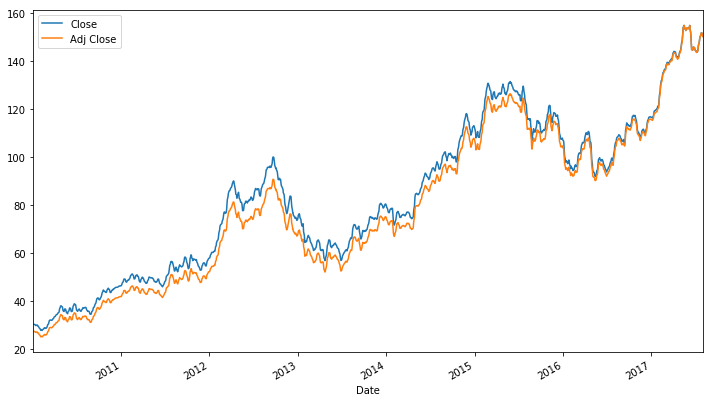

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

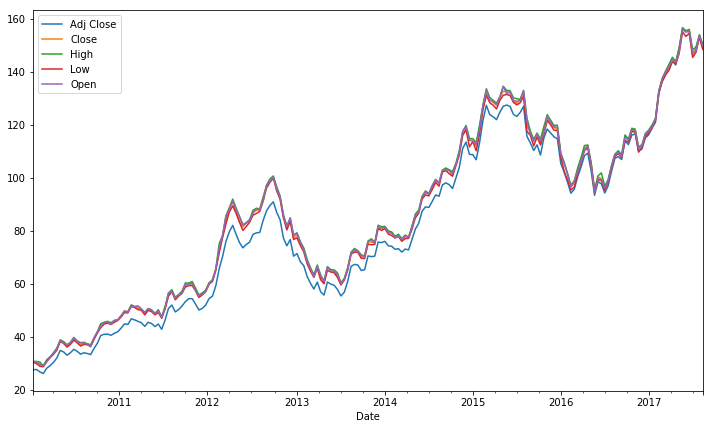

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

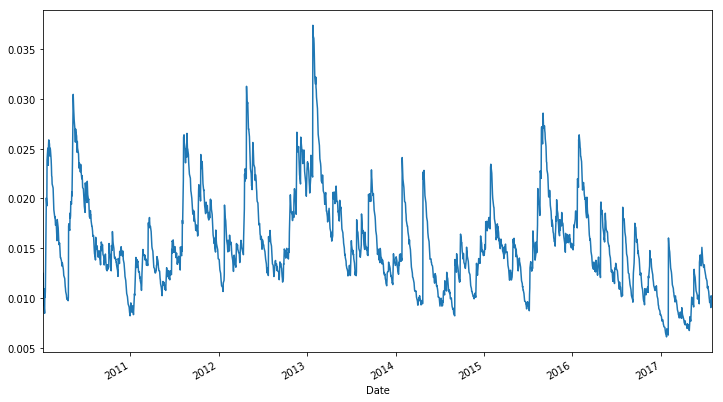

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

In [ ]:
!git clone https://github.com/ssanderson/pydata-toolbox

Cloning into 'pydata-toolbox'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 88 (delta 22), reused 14 (delta 8), pack-reused 52
Receiving objects: 100% (88/88), 11.87 MiB | 32.51 MiB/s, done.
Resolving deltas: 100% (35/35), done.


# "Real World" Data

In [ ]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2018', '2020')
avocados.head()

/content/demos/avocados.py:55: FutureWarning: The default value of regex will change from True to False in a future version.
  frame['Region'] = frame['Region'].str.replace(' U.S.', '')


,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2018-01-05 00:00:00+00:00,NATIONAL,HASS,False,3453,1.48,NaN,NaN
1,2018-01-05 00:00:00+00:00,NATIONAL,HASS,True,87,1.77,NaN,NaN
2,2018-01-05 00:00:00+00:00,NATIONAL,GREENSKIN,False,75,1.22,NaN,NaN
3,2018-01-05 00:00:00+00:00,NATIONAL,GREENSKIN,True,69,1.50,NaN,NaN
4,2018-01-05 00:00:00+00:00,NORTHEAST,HASS,False,1577,1.61,0.88,2.5


In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

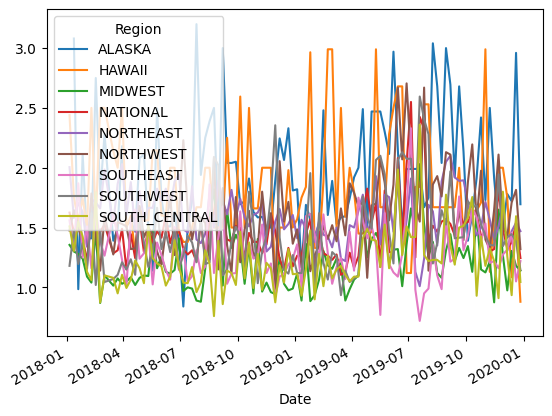

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

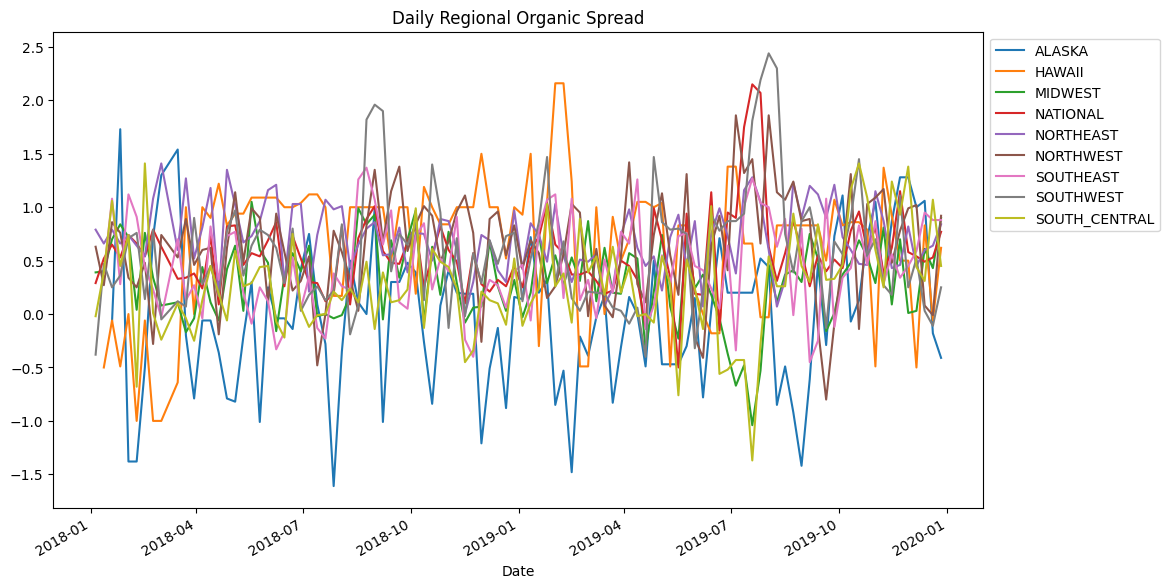

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,-0.187574,0.040128,0.184601,0.080386,0.086816,-0.075012,-0.022417,0.062924
HAWAII,-0.187574,1.000000,-0.020491,-0.060830,-0.063994,0.067583,-0.130246,0.009957,-0.062626
MIDWEST,0.040128,-0.020491,1.000000,-0.097493,-0.121838,0.025230,0.158419,-0.054006,0.514456
NATIONAL,0.184601,-0.060830,-0.097493,1.000000,0.312857,0.300185,0.360765,0.546368,0.049082
NORTHEAST,0.080386,-0.063994,-0.121838,0.312857,1.000000,0.040209,0.023981,0.054157,-0.073829
NORTHWEST,0.086816,0.067583,0.025230,0.300185,0.040209,1.000000,0.064817,0.363227,-0.044511
SOUTHEAST,-0.075012,-0.130246,0.158419,0.360765,0.023981,0.064817,1.000000,0.244455,0.081000
SOUTHWEST,-0.022417,0.009957,-0.054006,0.546368,0.054157,0.363227,0.244455,1.000000,-0.027505
SOUTH_CENTRAL,0.062924,-0.062626,0.514456,0.049082,-0.073829,-0.044511,0.081000,-0.027505,1.000000


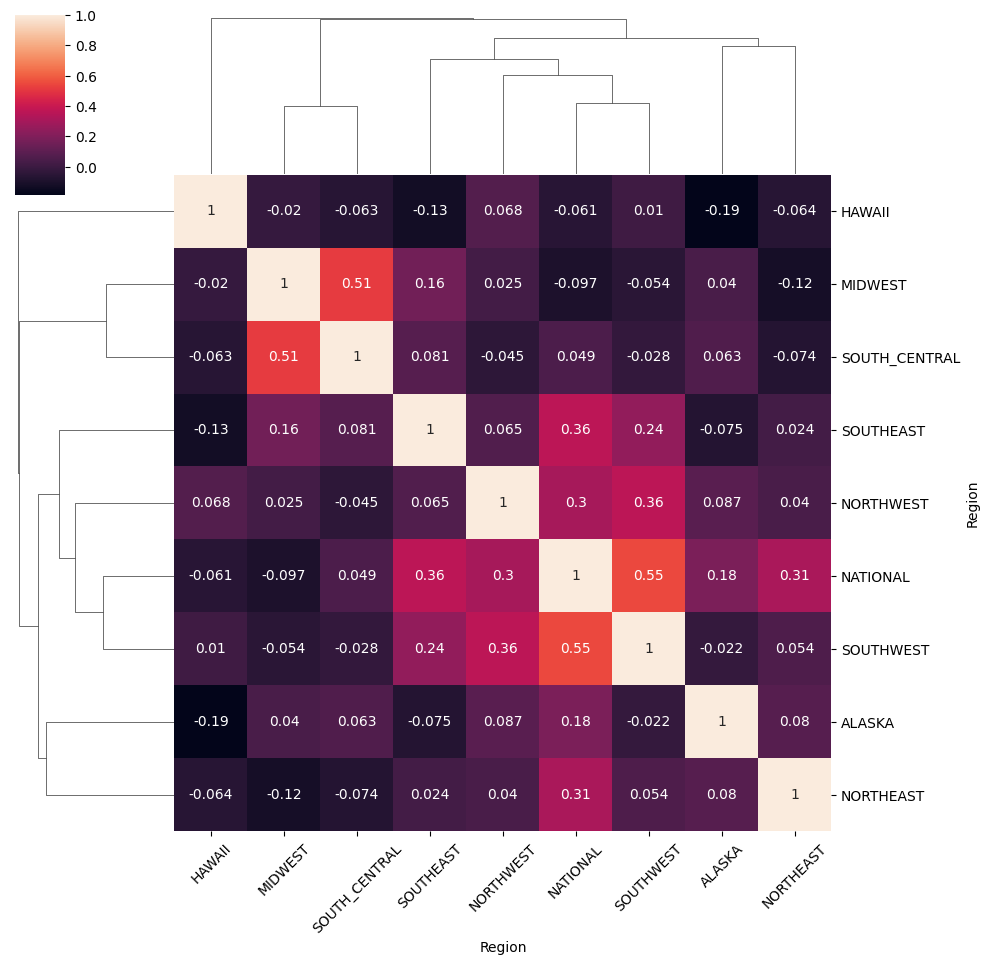

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [ ]:
import requests
import pandas as pd

a = requests.get('https://www.datos.gov.co/resource/gt2j-8ykr.json')
Data = a.json()
df = pd.DataFrame(Data)
display(df)

,fecha_reporte_web,id_de_caso,fecha_de_notificaci_n,departamento,departamento_nom,ciudad_municipio,ciudad_municipio_nom,edad,unidad_medida,sexo,...,ubicacion,estado,recuperado,fecha_inicio_sintomas,fecha_diagnostico,fecha_recuperado,tipo_recuperacion,per_etn_,fecha_muerte,nom_grupo_
0,2020-12-24 00:00:00,1556979,2020-12-22 00:00:00,76,VALLE,76001,CALI,67,1,F,...,Casa,Leve,Recuperado,2020-12-21 00:00:00,2020-12-23 00:00:00,2021-01-04 00:00:00,Tiempo,6,NaN,NaN
1,2020-12-24 00:00:00,1556980,2020-12-19 00:00:00,76,VALLE,76001,CALI,66,1,F,...,Casa,Leve,Recuperado,2020-12-07 00:00:00,2020-12-23 00:00:00,2020-12-25 00:00:00,Tiempo,6,NaN,NaN
2,2020-12-24 00:00:00,1556981,2020-12-19 00:00:00,76,VALLE,76001,CALI,68,1,F,...,Casa,Leve,Recuperado,2020-12-18 00:00:00,2020-12-22 00:00:00,2021-01-01 00:00:00,Tiempo,6,NaN,NaN
3,2020-12-24 00:00:00,1556982,2020-12-22 00:00:00,76,VALLE,76001,CALI,74,1,F,...,Fallecido,Fallecido,Fallecido,2020-12-17 00:00:00,2020-12-23 00:00:00,NaN,NaN,6,2020-12-30 00:00:00,NaN
4,2020-12-24 00:00:00,1556983,2020-12-22 00:00:00,76,VALLE,76001,CALI,65,1,F,...,Casa,Leve,Recuperado,2020-12-21 00:00:00,2020-12-23 00:00:00,2021-01-04 00:00:00,Tiempo,6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2020-08-25 00:00:00,560241,2020-08-12 00:00:00,50,META,50001,VILLAVICENCIO,24,1,M,...,Casa,Leve,Recuperado,2020-08-05 00:00:00,2020-08-23 00:00:00,2020-09-03 00:00:00,Tiempo,6,NaN,NaN
996,2020-08-25 00:00:00,560242,2020-08-12 00:00:00,50,META,50001,VILLAVICENCIO,67,1,M,...,Casa,Leve,Recuperado,2020-08-05 00:00:00,2020-08-23 00:00:00,2020-09-03 00:00:00,Tiempo,6,NaN,NaN
997,2020-08-25 00:00:00,560243,2020-08-12 00:00:00,50,META,50001,VILLAVICENCIO,52,1,F,...,Casa,Leve,Recuperado,2020-08-05 00:00:00,2020-08-23 00:00:00,2020-09-03 00:00:00,PCR,6,NaN,NaN
998,2020-08-25 00:00:00,560244,2020-08-12 00:00:00,50,META,50001,VILLAVICENCIO,30,1,F,...,Casa,Leve,Recuperado,2020-08-05 00:00:00,2020-08-23 00:00:00,2020-09-03 00:00:00,Tiempo,6,NaN,NaN


In [ ]:
Casos_COVID_BOGOTA = df.loc[df['ciudad_municipio_nom'] == 'BOGOTA']
display(Casos_COVID)

,fecha_reporte_web,id_de_caso,fecha_de_notificaci_n,departamento,departamento_nom,ciudad_municipio,ciudad_municipio_nom,edad,unidad_medida,sexo,...,ubicacion,estado,recuperado,fecha_inicio_sintomas,fecha_diagnostico,fecha_recuperado,tipo_recuperacion,per_etn_,fecha_muerte,nom_grupo_
19,2020-11-08 00:00:00,1137434,2020-11-05 00:00:00,11,BOGOTA,11001,BOGOTA,81,1,F,...,Fallecido,Fallecido,Fallecido,2020-10-31 00:00:00,2020-11-07 00:00:00,NaN,NaN,6,2020-11-11 00:00:00,NaN
28,2020-11-08 00:00:00,1137443,2020-11-04 00:00:00,11,BOGOTA,11001,BOGOTA,78,1,M,...,Fallecido,Fallecido,Fallecido,2020-10-31 00:00:00,2020-11-07 00:00:00,NaN,NaN,6,2020-11-16 00:00:00,NaN
37,2020-11-08 00:00:00,1137452,2020-11-05 00:00:00,11,BOGOTA,11001,BOGOTA,64,1,M,...,Casa,Leve,Recuperado,2020-10-31 00:00:00,2020-11-06 00:00:00,2020-11-15 00:00:00,Tiempo,6,NaN,NaN
54,2020-08-05 00:00:00,338065,2020-08-01 00:00:00,11,BOGOTA,11001,BOGOTA,44,1,M,...,Casa,Leve,Recuperado,2020-07-30 00:00:00,2020-08-04 00:00:00,2020-08-24 00:00:00,Tiempo,5,NaN,NaN
107,2020-08-05 00:00:00,338078,2020-08-02 00:00:00,11,BOGOTA,11001,BOGOTA,22,1,F,...,Casa,Leve,Recuperado,2020-07-30 00:00:00,2020-08-04 00:00:00,2020-08-24 00:00:00,Tiempo,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,2020-08-13 00:00:00,431945,2020-07-31 00:00:00,11,BOGOTA,11001,BOGOTA,57,1,M,...,Casa,Leve,Recuperado,2020-07-29 00:00:00,2020-08-13 00:00:00,2020-08-24 00:00:00,Tiempo,6,NaN,NaN
826,2020-08-13 00:00:00,431946,2020-07-31 00:00:00,11,BOGOTA,11001,BOGOTA,58,1,M,...,Casa,Leve,Recuperado,2020-07-27 00:00:00,2020-08-13 00:00:00,2020-08-22 00:00:00,PCR,6,NaN,NaN
827,2020-08-13 00:00:00,431947,2020-08-04 00:00:00,11,BOGOTA,11001,BOGOTA,6,2,F,...,Casa,Leve,Recuperado,2020-07-30 00:00:00,2020-08-13 00:00:00,2020-08-24 00:00:00,Tiempo,6,NaN,NaN
828,2020-08-13 00:00:00,431948,2020-08-04 00:00:00,11,BOGOTA,11001,BOGOTA,15,1,M,...,Casa,Leve,Recuperado,2020-08-04 00:00:00,2020-08-13 00:00:00,2020-08-29 00:00:00,Tiempo,6,NaN,NaN


In [ ]:
df.dtypes

fecha_reporte_web        object
id_de_caso               object
fecha_de_notificaci_n    object
departamento             object
departamento_nom         object
ciudad_municipio         object
ciudad_municipio_nom     object
edad                     object
unidad_medida            object
sexo                     object
fuente_tipo_contagio     object
ubicacion                object
estado                   object
recuperado               object
fecha_inicio_sintomas    object
fecha_diagnostico        object
fecha_recuperado         object
tipo_recuperacion        object
per_etn_                 object
fecha_muerte             object
nom_grupo_               object
dtype: object

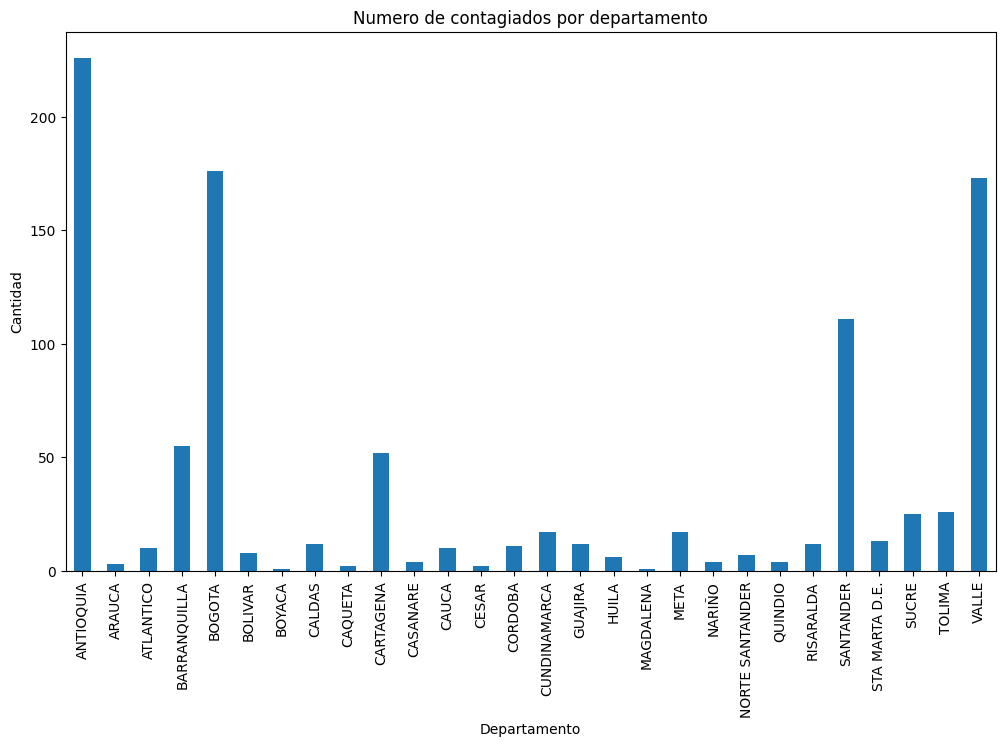

In [ ]:
import matplotlib.pyplot as plt
eps = df.groupby('departamento_nom')['id_de_caso'].count()
eps.plot(kind='bar')
plt.title('Numero de contagiados por departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad')
plt.show()

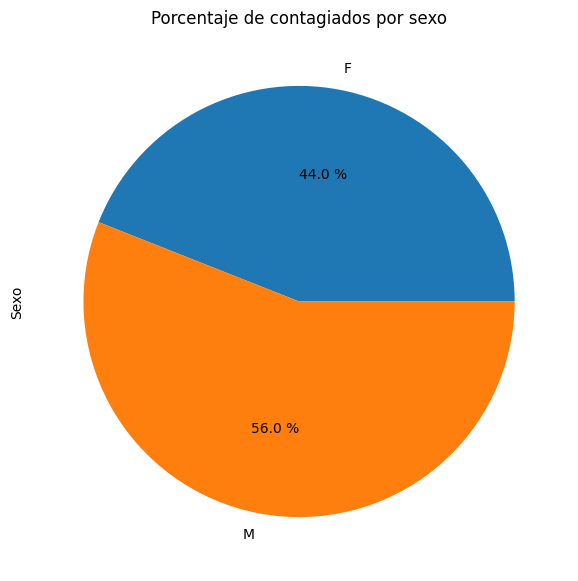

In [ ]:
import matplotlib.pyplot as plt
estrato = df.groupby('sexo')['id_de_caso'].count()
estrato.plot(kind='pie',autopct="%0.1f %%")
plt.title('Porcentaje de contagiados por sexo')

plt.ylabel('Sexo')
plt.show()

In [ ]:
pacientes_recuperados = df.groupby('recuperado')['id_de_caso'].count()
print(pacientes_recuperados)

recuperado
Fallecido      35
N/A             5
Recuperado    960
Name: id_de_caso, dtype: int64


# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!